# Task 1: XOR

In [14]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
% matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where __ _wi, wh, b, a, c_ __ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input (x0, x1) = (1, 0), ground truth (g1, g2) = (1, 1), h0 = 0, (wi, wh, b, a, c) = (1, 1, 1, 1, 1), compute __ _(dwi, dwh, db, da, dc)_ __, which are the gradients of loss with repect to 5 parameters __ _(wi, wh, b, a, c)_ __.

![bptt](./img/bptt.png)

<span style="color:red">TODO:</span>

Answer the above question. 

* **[fill in here: Enter your derivations and the computational process]**
* You can use LATEX to edit the equations, and Jupyter notebook can recognize basic LATEX syntax. Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

$h_{1}$=0.881,
$h_{2}$=0.868,
$y_{1}$=1.881,
$y_{2}$=1.868

L=$({g_{1}-y_{1}})^{2}$+$({g_{2}-y_{2}})^{2}$
L=$({1-1.881})^{2}$+$({1-1.868})^{2}= 1.56$

$\partial L/\partial y= \sum_{t=1}^{2}\partial L_{t}/\partial {y_{t}}$
$\partial L/\partial y= \partial L_{1}/\partial {y_{1}} + \partial L_{2}/\partial {y_{2}}$
$\partial L/\partial y= 2({g_{1}-y_{1}})*-1+2({g_{2}-y_{2}})*-1=3.498$

$\partial L/\partial c$:

$\partial L/\partial c=\sum_{t=1}^{2}\partial L_{t}/\partial {y_{t}} * \partial y_{t}/\partial {c}$

$\partial L/\partial c=\partial L_{1}/\partial {y_{1}} * \partial y_{1}/\partial {c}+ \partial L_{2}/\partial {y_{2}} * \partial y_{2}/\partial {c}$

$\partial y_{1}/\partial {c}= 1$,
$\partial y_{2}/\partial {c}= 1$

$\partial L/\partial c= 2*0.881 + 2*0.868 = 3.498$


$\partial L/\partial a$:

$\partial L/\partial a=\sum_{t=1}^{2}\partial L_{t}/\partial {y_{t}} * \partial y_{t}/\partial {a}$

$\partial L/\partial a=\partial L_{1}/\partial {y_{1}} * \partial y_{1}/\partial {a}+ \partial L_{2}/\partial {y_{2}} * \partial y_{2}/\partial {a}$

$\partial y_{1}/\partial {a}= h$,
$\partial y_{2}/\partial {a}= h$

$\partial L/\partial a= 2*0.881*0.881 + 2*0.868*0.868 = 3.058$



$\partial L/\partial {w_{i}}=\sum_{t=1}^{2}\sum_{j=1}^{t}\partial L_{t}/\partial {y_{t}} * \partial y_{t}/\partial {h_{t}}*\partial h_{t}/\partial {h_{j}}*\partial h_{j}/\partial {w_{i}}$


$\partial L/\partial {w_{i}}=\partial L_{1}/\partial {y_{1}} * \partial y_{1}/\partial {h_{1}}*\partial h_{1}/\partial {h_{1}}*\partial h_{1}/\partial {w_{i}} + \partial L_{2}/\partial {y_{2}} * \partial y_{2}/\partial {h_{2}}*\partial h_{2}/\partial {h_{1}}*\partial h_{1}/\partial {w_{i}} + \partial L_{2}/\partial {y_{2}} * \partial y_{2}/\partial {h_{2}}*\partial h_{2}/\partial {h_{2}}*\partial h_{2}/\partial {w_{i}}$

$\partial L/\partial {w_{i}}= (-2*2({g_{1}-y_{1}})*a*h_{1}*(1-h_{1})*x_{0}) + (-2*2({g_{2}-y_{2}})*a*(h_{2}*(1-h_{2})*w_{h})*(h_{1}*(1-h_{1})*x_{0}) + (-2*2({g_{2}-y_{2}})*a*h_{2}*(1-h_{2})*x_{1})$

$\partial L/\partial {w_{i}}=(-2*-0.881*0.119*0.881*1)+(-2*-0.868*1*0.132*0.868*.119*0.881)+0 =0.2055$


$\partial L/\partial {w_{h}}=\sum_{t=1}^{2}\sum_{j=1}^{t}\partial L_{t}/\partial {y_{t}} * \partial y_{t}/\partial {h_{t}}*\partial h_{t}/\partial {h_{j}}*\partial h_{j}/\partial {w_{h}}$


$\partial L/\partial {w_{h}}=\partial L_{1}/\partial {y_{1}} * \partial y_{1}/\partial {h_{1}}*\partial h_{1}/\partial {h_{1}}*\partial h_{1}/\partial {w_{h}} + \partial L_{2}/\partial {y_{2}} * \partial y_{2}/\partial {h_{2}}*\partial h_{2}/\partial {h_{1}}*\partial h_{1}/\partial {w_{h}} + \partial L_{2}/\partial {y_{2}} * \partial y_{2}/\partial {h_{2}}*\partial h_{2}/\partial {h_{2}}*\partial h_{2}/\partial {w_{h}}$

$\partial L/\partial {w_{h}}= (-2*2({g_{1}-y_{1}})*a*h_{1}*(1-h_{1})*h_{0}) + (-2*2({g_{2}-y_{2}})*a*(h_{2}*(1-h_{2})*w_{h})*(h_{1}*(1-h_{1})*h_{0}) + (-2*2({g_{2}-y_{2}})*a*h_{2}*(1-h_{2})*h_{1})$

$\partial L/\partial {w_{h}}=(-2*-0.881*0.119*0.881*0)+(-2*-0.868*1*0.132*0.868*.119*0.881*0)+(-2*-0.868*1*0.132*0.868*0.881) =0.1752$

$\partial L/\partial b=\sum_{t=1}^{2}\sum_{j=1}^{t}\partial L_{t}/\partial {y_{t}} * \partial y_{t}/\partial {h_{t}}*\partial h_{t}/\partial {h_{j}}*\partial h_{j}/\partial {w_{h}}$


$\partial L/\partial b=\partial L_{1}/\partial {y_{1}} * \partial y_{1}/\partial {h_{1}}*\partial h_{1}/\partial {h_{1}}*\partial h_{1}/\partial b + \partial L_{2}/\partial {y_{2}} * \partial y_{2}/\partial {h_{2}}*\partial h_{2}/\partial {h_{1}}*\partial h_{1}/\partial b + \partial L_{2}/\partial {y_{2}} * \partial y_{2}/\partial {h_{2}}*\partial h_{2}/\partial {h_{2}}*\partial h_{2}/\partial b$

$\partial L/\partial b= (-2*2({g_{1}-y_{1}})*a*h_{1}*(1-h_{1})*1) + (-2*2({g_{2}-y_{2}})*a*(h_{2}*(1-h_{2})*w_{h})*(h_{1}*(1-h_{1})*1) + (-2*2({g_{2}-y_{2}})*a*h_{2}*(1-h_{2})*1)$

$\partial L/\partial b=(-2*-0.881*0.119*0.881*1)+(-2*-0.868*1*0.132*0.868*.119*0.881*1)+(-2*-0.868*1*0.132*0.868*1) = 0.1847+0.0208+0.1989= 0.4044$


$\partial L/\partial b=0.4044$,
$\partial L/\partial {w_{h}}=0.1752$,
$\partial L/\partial {w_{i}}=0.2055$,
$\partial L/\partial a= 3.058$,
$\partial L/\partial c=3.498$,


## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the LSTM. Please read the source code for more information.

In [15]:
from ecbm4040.xor.utils import create_dataset

In [3]:
(create_dataset(10))

(array([[[1],
         [1],
         [1],
         [0],
         [0],
         [0],
         [0],
         [0]],
 
        [[1],
         [1],
         [1],
         [1],
         [1],
         [0],
         [0],
         [1]],
 
        [[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [1]],
 
        [[1],
         [1],
         [1],
         [0],
         [0],
         [0],
         [1],
         [0]],
 
        [[1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         [0],
         [1],
         [1],
         [1],
         [0]],
 
        [[1],
         [0],
         [1],
         [0],
         [1],
         [1],
         [0],
         [0]],
 
        [[1],
         [1],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0]],
 
        [[1],
         [0],
         [1],
         [1],
         [0],
         [

### Build a network using a Tensorlow LSTMCell
This section shows an example how to build a RNN network using an LSTM cell. LSTM cell is an inbuilt class in tensorflow which implements the real behavior of the LSTM neuron. 

Reference: [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/LSTMCell)

In [16]:
from tensorflow.contrib.rnn import LSTMCell

tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# define LSTM cell
lstm_units = 64
cell = LSTMCell(lstm_units,num_proj=2,state_is_tuple=True)

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

### Training 

<span style='color:red'>TODO:</span> 
1. Build your training funciton for RNN; 
2. Plot the cost during the traning

epoch 1: train cost = 0.026749536395072937
epoch 2: train cost = 0.000578653416596353
epoch 3: train cost = 0.00029093693592585623
epoch 4: train cost = 0.00020755617879331112
epoch 5: train cost = 0.00015722477110102773
epoch 6: train cost = 0.000123407575301826
epoch 7: train cost = 9.970094833988696e-05
epoch 8: train cost = 8.224844350479543e-05
epoch 9: train cost = 6.901350570842624e-05
epoch 10: train cost = 5.8739933592732996e-05
epoch 11: train cost = 5.062549462309107e-05
epoch 12: train cost = 4.409994653542526e-05
epoch 13: train cost = 3.879555515595712e-05
epoch 14: train cost = 3.442031447775662e-05
epoch 15: train cost = 3.0763072572881356e-05
epoch 16: train cost = 2.7675383535097353e-05
epoch 17: train cost = 2.504645090084523e-05
epoch 18: train cost = 2.2792994059273042e-05
epoch 19: train cost = 2.0862064047832973e-05
epoch 20: train cost = 1.9170829546055757e-05


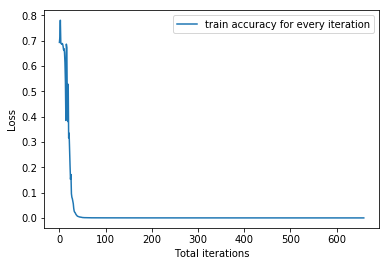

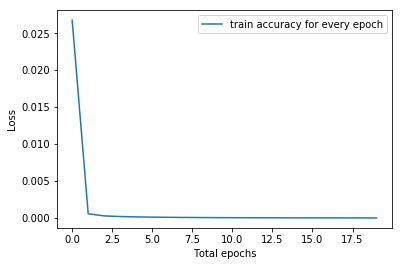

In [17]:
# YOUR TRAINING AND PLOTTING CODE HERE
from tensorflow.contrib.rnn import LSTMCell

X_train,y_train=create_dataset(10000)

tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# define LSTM cell
lstm_units = 64
cell = LSTMCell(lstm_units,num_proj=2,state_is_tuple=True)
print(cell)
# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

init = tf.global_variables_initializer()


batch_size_m = 300
num_batch_m = X_train.shape[0]//batch_size_m
epochs=20
train_cost_li=[]
train_cost_li_ep=[]
with tf.Session() as sess:
    sess.run(init)
    for e in range(epochs):
        for i in range(num_batch_m):
            X_batch_m, y_batch_m = X_train[i*batch_size_m:(i+1)*batch_size_m,:,:], y_train[i*batch_size_m:(i+1)*batch_size_m,:]
            _,train_cost=sess.run([optimizer,loss], feed_dict={input_data: X_batch_m, output_data: y_batch_m})
            train_cost_li.append(train_cost)
        train_cost_li_ep.append(train_cost)
        print('epoch {}: train cost = {}'.format(e+1, train_cost))
    
plt.plot(train_cost_li, label="train accuracy for every iteration")
plt.xlabel("Total iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()  


plt.plot(train_cost_li_ep, label="train accuracy for every epoch")
plt.xlabel("Total epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()  


## Task 1, Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyLSTMCell** in ecbm4040/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [18]:
import tensorflow as tf
print(tf.__file__)

/home/ecbm4040/.local/lib/python3.5/site-packages/tensorflow/__init__.py


In [19]:
from ecbm4040.xor.rnn import MyLSTMCell

# recreate xor netowrk with your own LSTM cell
tf.reset_default_graph()
X_train,y_train=create_dataset(100)
X_val,y_val=create_dataset(70)
#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own LSTM cell
lstm_units = 64
cell = MyLSTMCell(lstm_units,num_proj=2)

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

epoch 1: train cost = 0.10476277023553848
epoch 2: train cost = 0.08547595888376236
epoch 3: train cost = 0.08518090844154358
epoch 4: train cost = 0.08509404957294464
epoch 5: train cost = 0.08504039794206619
epoch 6: train cost = 0.08501043170690536
epoch 7: train cost = 0.08499085903167725
epoch 8: train cost = 0.08497688174247742
epoch 9: train cost = 0.08496647328138351
epoch 10: train cost = 0.08495836704969406
epoch 11: train cost = 0.08495187759399414
epoch 12: train cost = 0.08494653552770615
epoch 13: train cost = 0.0849420577287674
epoch 14: train cost = 0.08493825793266296
epoch 15: train cost = 0.08493504673242569
epoch 16: train cost = 0.08493225276470184
epoch 17: train cost = 0.08492987602949142
epoch 18: train cost = 0.08492779731750488
epoch 19: train cost = 0.0849260464310646
epoch 20: train cost = 0.08492450416088104


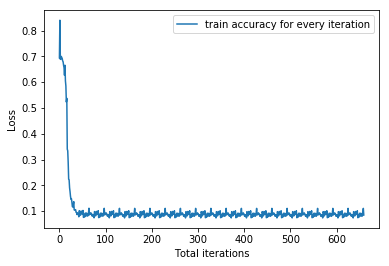

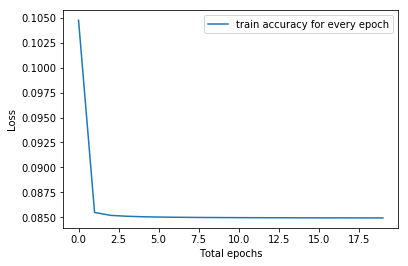

In [20]:
# YOUR TRAINING AND PLOTTING CODE HERE
from ecbm4040.xor.rnn import MyLSTMCell

X_train,y_train=create_dataset(10000)

tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# define LSTM cell
lstm_units = 64
cell = MyLSTMCell(lstm_units,num_proj=2)
print(cell)
# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

init = tf.global_variables_initializer()


batch_size_m = 300
num_batch_m = X_train.shape[0]//batch_size_m
epochs=20
train_cost_li=[]
train_cost_li_ep=[]
with tf.Session() as sess:
    sess.run(init)
    for e in range(epochs):
        for i in range(num_batch_m):
            X_batch_m, y_batch_m = X_train[i*batch_size_m:(i+1)*batch_size_m,:,:], y_train[i*batch_size_m:(i+1)*batch_size_m,:]
            _,train_cost=sess.run([optimizer,loss], feed_dict={input_data: X_batch_m, output_data: y_batch_m})
            train_cost_li.append(train_cost)
        train_cost_li_ep.append(train_cost)
        print('epoch {}: train cost = {}'.format(e+1, train_cost))
    
plt.plot(train_cost_li, label="train accuracy for every iteration")
plt.xlabel("Total iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()  


plt.plot(train_cost_li_ep, label="train accuracy for every epoch")
plt.xlabel("Total epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()  

